In [54]:
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

In [55]:
PATH_FILE_SCORE = './scoreFiltratiFinaliCsv.csv'
# PATH_FILE_SCORE = './scoreCsvDatasetFinale.csv'

scores = pd.read_csv(PATH_FILE_SCORE)

In [56]:
def calcola_id_soggetto_da_utente(u):
    return u.split("_")[0]

def calcola_num_acquisizione_da_utente(u):
    return int(u.split("_")[1])

In [57]:
scores['Primo soggetto'] = scores['Utente1'].apply(lambda u: calcola_id_soggetto_da_utente(u))
scores['Secondo soggetto'] = scores['Utente2'].apply(lambda u: calcola_id_soggetto_da_utente(u))

In [70]:
a = scores[scores['Primo soggetto'] == scores['Secondo soggetto']]

In [73]:
b = a.sort_values(by='ScoreML')

In [74]:
b

,Utente1,Utente2,ScoreML,Primo soggetto,Secondo soggetto,ScoreNormalizzato
91800,MarcheseLuigi_002,MarcheseLuigi_007,0.112108,MarcheseLuigi,MarcheseLuigi,0.11
86354,LopreteAntonio_002,LopreteAntonio_007,0.114850,LopreteAntonio,LopreteAntonio,0.11
91539,MarcheseLuigi_000,MarcheseLuigi_011,0.116561,MarcheseLuigi,MarcheseLuigi,0.11
91538,MarcheseLuigi_000,MarcheseLuigi_007,0.124767,MarcheseLuigi,MarcheseLuigi,0.12
91801,MarcheseLuigi_002,MarcheseLuigi_011,0.129947,MarcheseLuigi,MarcheseLuigi,0.12
...,...,...,...,...,...,...
124173,TelescaAntonello_003,TelescaAntonello_004,0.747910,TelescaAntonello,TelescaAntonello,0.74
9367,AlberucciAlessandro_001,AlberucciAlessandro_002,0.748001,AlberucciAlessandro,AlberucciAlessandro,0.74
77112,GruossoMonica_004,GruossoMonica_005,0.750399,GruossoMonica,GruossoMonica,0.75
41175,ColangeloFederico_001,ColangeloFederico_002,0.750674,ColangeloFederico,ColangeloFederico,0.75


In [58]:
scores.head()

,Utente1,Utente2,ScoreML,Primo soggetto,Secondo soggetto
0,AgatielloRoberto_000,AgatielloRoberto_001,0.526569,AgatielloRoberto,AgatielloRoberto
1,AgatielloRoberto_000,AgatielloRoberto_002,0.491637,AgatielloRoberto,AgatielloRoberto
2,AgatielloRoberto_000,AgatielloRoberto_003,0.525314,AgatielloRoberto,AgatielloRoberto
3,AgatielloRoberto_000,AgatielloRoberto_004,0.516008,AgatielloRoberto,AgatielloRoberto
4,AgatielloRoberto_000,AgatielloRoberto_005,0.567200,AgatielloRoberto,AgatielloRoberto


### Calcolo FAR

In [59]:
threshold_far = []
threshold_frr = []
for threshold in tqdm(range(1, 101)):
    cont_far = 0
    cont_frr = 0
    for i, row in scores.iterrows():
        primo_soggetto = row['Primo soggetto']
        secondo_soggetto = row['Secondo soggetto']
        scoreMl = row['ScoreML'] * 100
        if(primo_soggetto != secondo_soggetto and scoreMl > threshold):
            cont_far += 1
        if(primo_soggetto == secondo_soggetto and scoreMl < threshold):
            cont_frr += 1
    threshold_far.append(cont_far)
    threshold_frr.append(cont_frr)

100%|██████████| 100/100 [03:15<00:00,  1.95s/it]


In [60]:
max_far = len(scores[scores['Primo soggetto'] != scores['Secondo soggetto']])
max_frr = len(scores[scores['Primo soggetto'] == scores['Secondo soggetto']])

In [75]:
threshold_far_norm = [i / max_far for i in threshold_far]
threshold_frr_norm = [i / max_frr for i in threshold_frr]

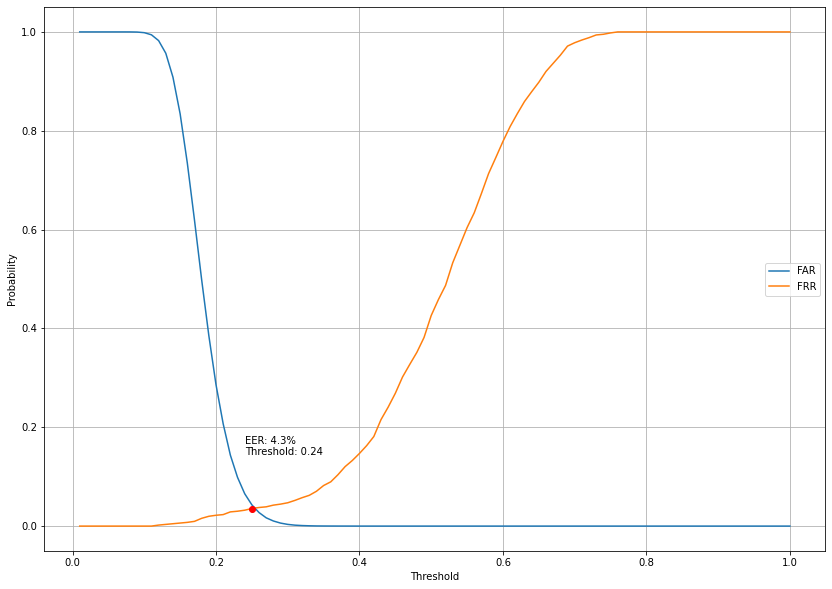

In [63]:
y_values = [i/100 for i in range(1, 101)]

plt.figure(figsize=(14,10))
plt.plot(y_values, threshold_far_norm, label='FAR')
plt.plot(y_values, threshold_frr_norm, label='FRR')
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Probability")
plt.legend()


idx = np.argwhere(np.diff(np.sign(np.array(threshold_far_norm) - np.array(threshold_frr_norm)))).flatten()
plt.plot(np.array(y_values)[idx], np.array(threshold_frr_norm)[idx], 'ro')

index_eer = int(idx)
EER_perc = round((threshold_far_norm[index_eer] * 100)* 100)/ 100

plt.text(index_eer/100, EER_perc/100 + 0.1, f'EER: {EER_perc}%\nThreshold: {index_eer/100}')

plt.show()

### Calcolo seconda tipologia di grafico

In [64]:
scores['ScoreNormalizzato'] = scores['ScoreML'].apply(lambda x: int(x * 100)/100)

In [65]:
list_scores = [i/100 for i in range(101)]
impostori = []
genuini = []
for score in tqdm(list_scores):
    cont_impostori = 0
    cont_genuini = 0
    for i, row in scores.iterrows():
        primo_soggetto = row['Primo soggetto']
        secondo_soggetto = row['Secondo soggetto']
        score_normalizzato = row['ScoreNormalizzato']
        if(primo_soggetto != secondo_soggetto and score_normalizzato == score):
            cont_impostori += 1
        if(primo_soggetto == secondo_soggetto and score_normalizzato == score):
            cont_genuini += 1
    impostori.append(cont_impostori)
    genuini.append(cont_genuini)

100%|██████████| 101/101 [03:16<00:00,  1.95s/it]


In [66]:
max_genuini = max(genuini)
max_impostori = max(impostori)

In [67]:
genuini_norm = [i / max_genuini for i in genuini]
impostori_norm = [i / max_impostori for i in impostori]

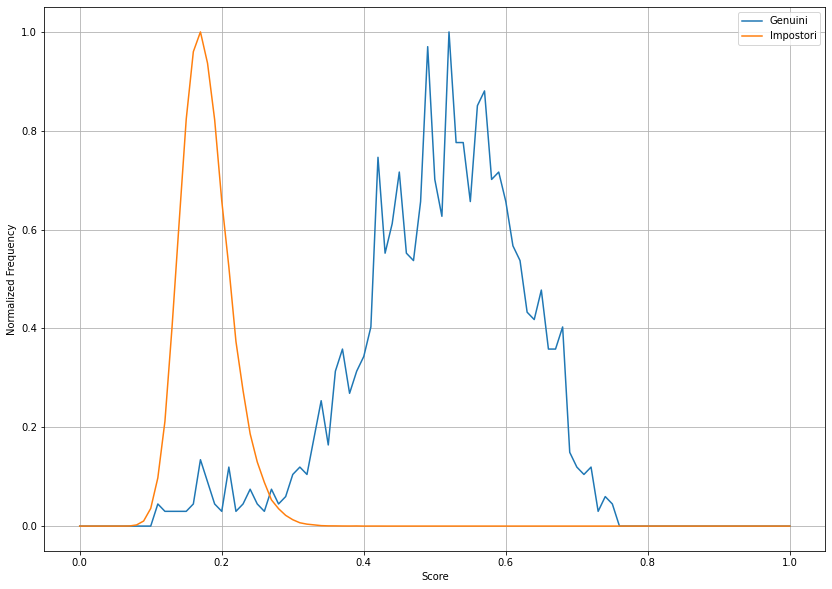

In [68]:
y_values = list_scores

plt.figure(figsize=(14,10))
plt.plot(y_values, genuini_norm, label='Genuini')
plt.plot(y_values, impostori_norm, label='Impostori')
plt.grid()
plt.xlabel("Score")
plt.ylabel("Normalized Frequency")
plt.legend()


# idx = np.argwhere(np.diff(np.sign(np.array(genuini_norm) - np.array(impostori_norm)))).flatten()
# plt.plot(np.array(y_values)[idx[1]], np.array(impostori_norm)[idx[1]], 'ro')

# index_eer = int(idx[1])
# EER_perc = round((impostori_norm[index_eer] * 100)* 100)/ 100

# plt.text(index_eer/100, EER_perc/100 + 0.1, f'EER: {EER_perc}%\nThreshold: {index_eer/100}')

plt.show()